In [2]:
import tensorflow.keras as keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import os
import numpy as np
import matplotlib.pyplot as plt

# Fashion MNIST

<center><img src = "https://www.tensorflow.org/images/fashion-mnist-sprite.png" height="120" width="400"></center>

# Load dataset

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [4]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


# Explore dataset

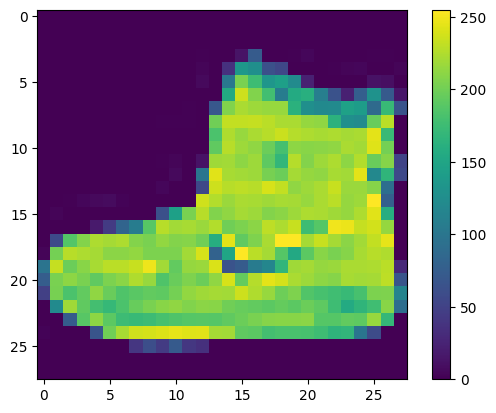

In [5]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

# Classes

In [6]:
num_classes = len(np.unique(y_train))
num_classes

10

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Grayscale

In [8]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

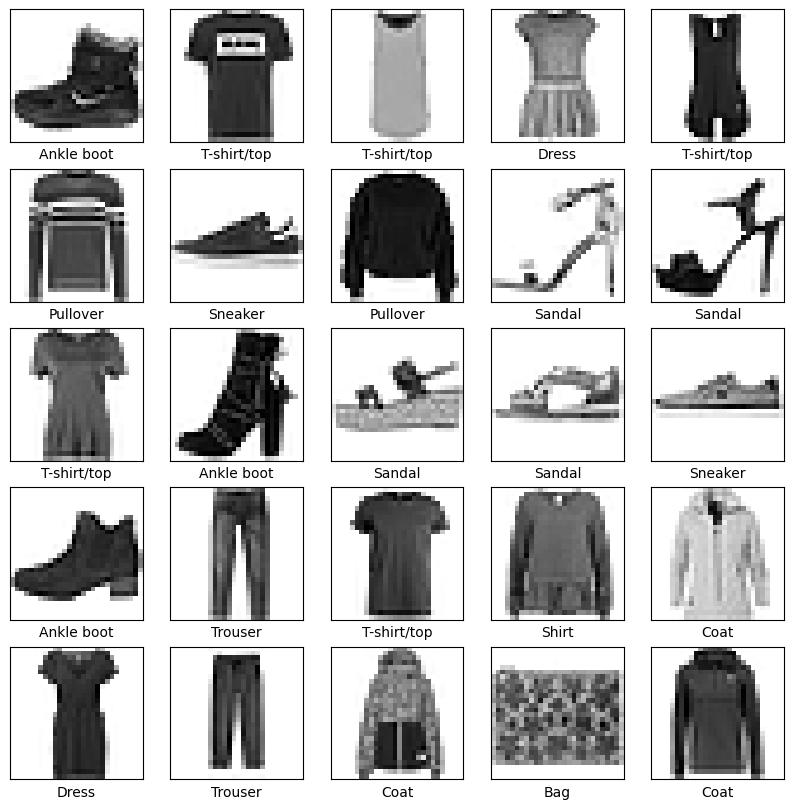

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

# Add channel

In [10]:
x_train = np.expand_dims(x_train, axis = 3)
x_test = np.expand_dims(x_test, axis = 3)

In [11]:
input_shape = x_train.shape[1:]
input_shape

(28, 28, 1)

# One-hot encoding

In [12]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Model definition

In [13]:
model = Sequential()
model.add(Conv2D(3, kernel_size = (3, 3), input_shape = input_shape, padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 3)         30        
                                                                 
 activation (Activation)     (None, 28, 28, 3)         0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 3)         0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 588)               0         
                                                                 
 dense (Dense)               (None, 10)                5890      
                                                                 
 activation_1 (Activation)   (None, 10)                0         
                                                        

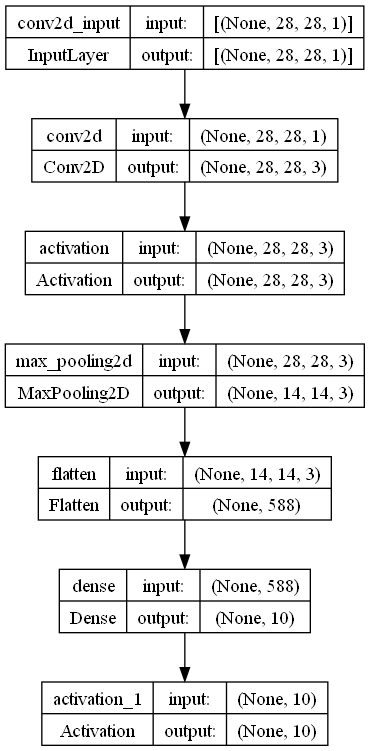

In [15]:
keras.utils.plot_model(model, to_file = 'fm_model.png', show_shapes = True)

# Optimizer

In [16]:
opt = keras.optimizers.Adam(lr = 0.01)

# Compile model

In [17]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = opt,
              metrics = ['accuracy'])

# Training parameters

In [18]:
batch_size = 16
epochs = 2

In [19]:
model.fit(x_train, 
          y_train,
          batch_size = batch_size,
          epochs = epochs,
          validation_data = (x_test, y_test))

Epoch 1/2
3750/3750 [==============================] - 25s 6ms/step - loss: 0.5147 - accuracy: 0.8219 - val_loss: 0.4125 - val_accuracy: 0.8520
Epoch 2/2
3750/3750 [==============================] - 19s 5ms/step - loss: 0.3799 - accuracy: 0.8657 - val_loss: 0.3868 - val_accuracy: 0.8631


In [20]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 2s 5ms/step - loss: 0.3868 - accuracy: 0.8631
Test loss: 0.38676363229751587
Test accuracy: 0.863099992275238


# Save model

In [21]:
model.save('fm_model.h5')

c:\Users\maria\anaconda3\envs\mario_env_windows\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Load model

In [22]:
from tensorflow.keras.models import load_model
model = load_model('fm_model.h5')
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 3)         30        
                                                                 
 activation (Activation)     (None, 28, 28, 3)         0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 3)         0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 588)               0         
                                                                 
 dense (Dense)               (None, 10)                5890      
                                                                 
 activation_1 (Activation)   (None, 10)                0         
                                                        

# See intermediate activations

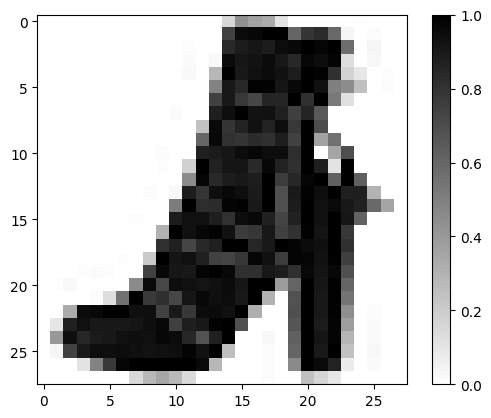

In [24]:
plt.figure()
plt.imshow(x_train[11].reshape((28, 28)), cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()
img_tensor = np.expand_dims(x_train[11],0)

In [25]:
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers[:3]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(img_tensor)


1/1 [==============================] - 0s 320ms/step


In [26]:
first_layer_activation = activations[2]
print(first_layer_activation.shape)

(1, 14, 14, 3)


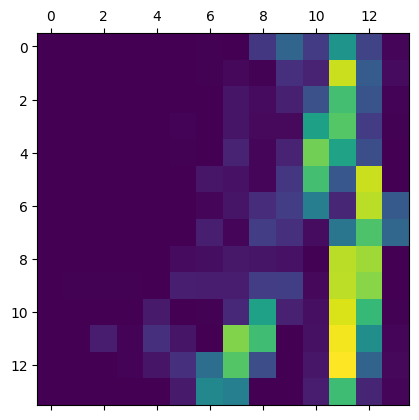

In [31]:
import matplotlib.pyplot as plt
plt.matshow(first_layer_activation[0, :, :, 2], cmap='viridis')